<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/HW1_JudsonLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging HW 1

Judson Lima

OPTI 556, Fall 2023

##Fourier series estimation of a signal:

Estimation is done using 4 signals, intent is to show a similar effect to Figure 2.4 of the textbook. First step is to apply the initialization code, this then can be used to show a Fourier series representing a signal $f(x)$ within a given interval [-L , L].


##Libraries

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib as mpl
import scipy.integrate as integrate

##Signal # 1

  As a particular example, consider,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } -.5<x \leq -.25\\
        4*(x+.25)&\text{ for }  -.25<x \leq 0\\
        1 &\text{ for } 0<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$
     

##List of Signals

  First function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        1 &\text{ for } -.25<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$


  Second function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        2*(x+.25) &\text{ for } -.25<x\leq .25\\
        1 &\text{ for } .25<x
    \end{aligned}}\right.
  $$

  Third function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        4(x+.25) &\text{ for } -.25<x\leq 0\\
        -4(x-.25) &\text{ for } 0<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$

  Forth function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        1 &\text{ for } -.25<x\leq 0\\
        -1 &\text{ for } 0<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$

In [30]:
def f1(x):
  if x<-.25:
    f1=0.
  elif x<.25:
    f1=1.
  else:
    f1=0.
  return f1

def f2(x):
  if x<-.25:
    f2=0.
  elif x<.25:
    f2=2.*(x+.25)
  else:
    f2=1.
  return f2

def f3(x):
  if x<-.25:
    f3=0.
  elif x<=0:
    f3=4.*(x+.25)
  elif x<=.25:
    f3=-4.*(x-.25)
  else:
    f3=0.
  return f3

def f4(x):
  if x<-.25:
    f4=0.
  elif x<0:
    f4=1.
  elif x<.25:
    f4=-1.
  else:
    f4=0.
  return f4

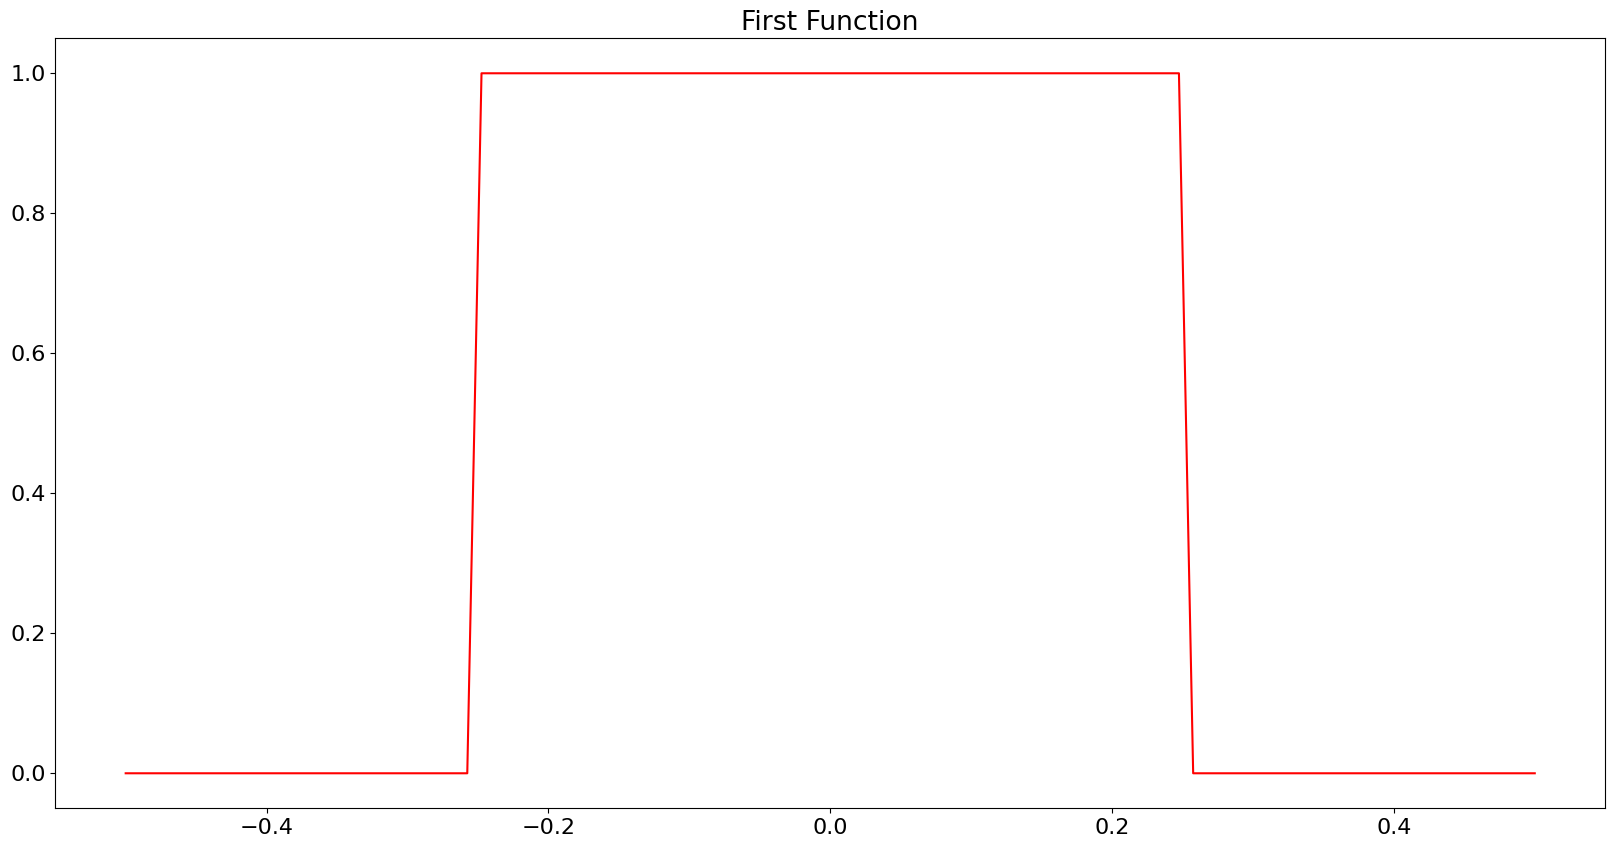

In [8]:
from numpy import vectorize
vf1 = vectorize(f1)
plt.plot(np.linspace(-.5,.5,1000),vf1(np.linspace(-.5,.5,1000)),'r')
plt.title("First Function")
plt.savefig('exampleFF.png')


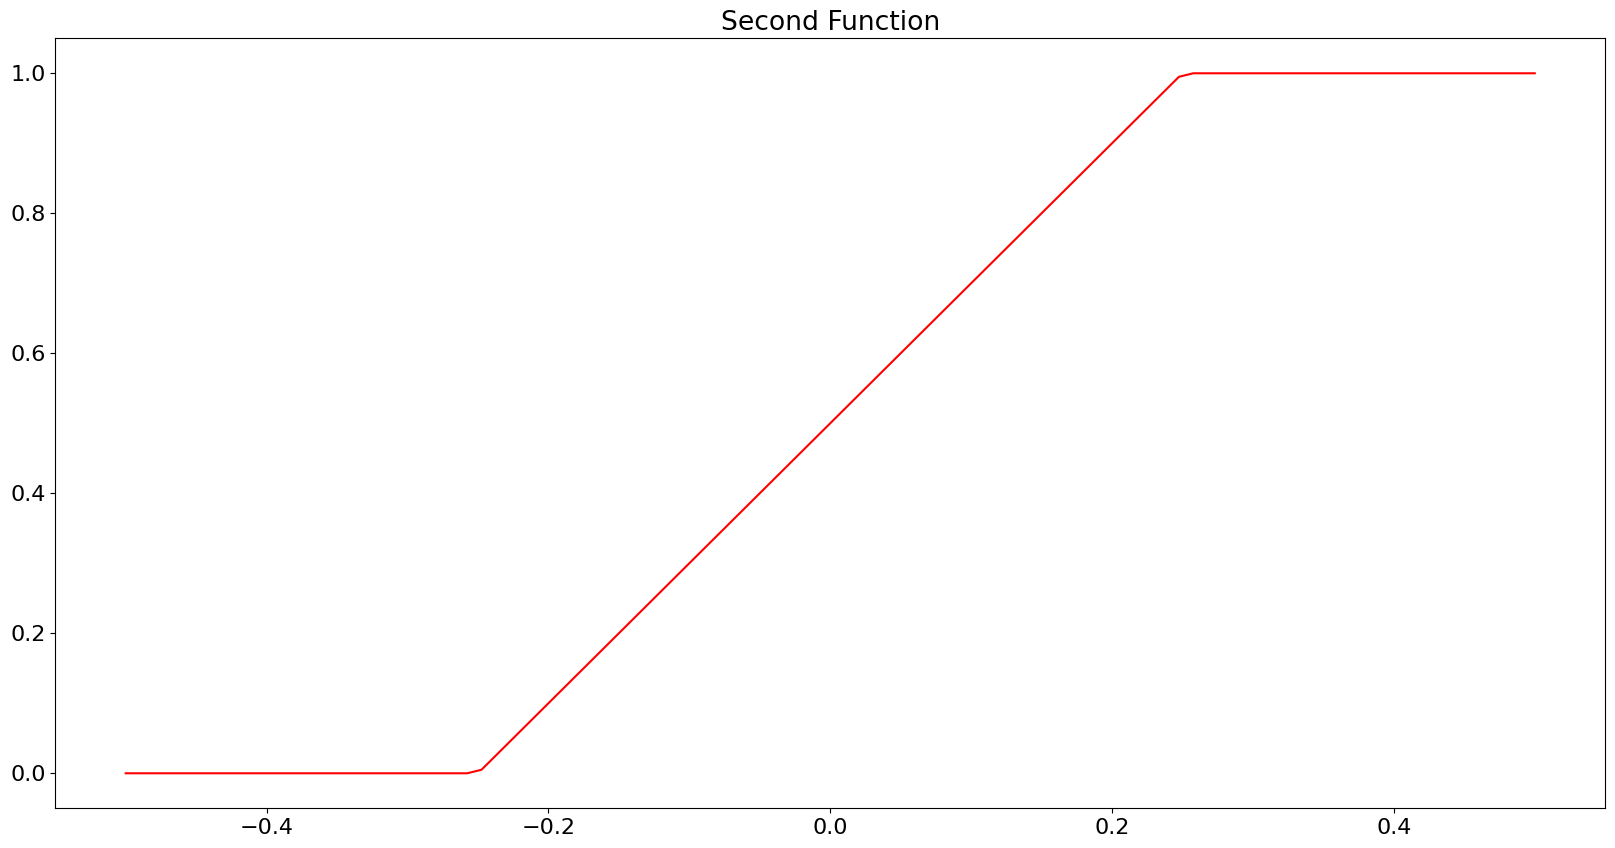

In [21]:
vf2 = vectorize(f2)
plt.plot(np.linspace(-.5,.5,100),vf2(np.linspace(-.5,.5,100)),'r')
plt.title("Second Function")
plt.savefig('exampleSF.png')

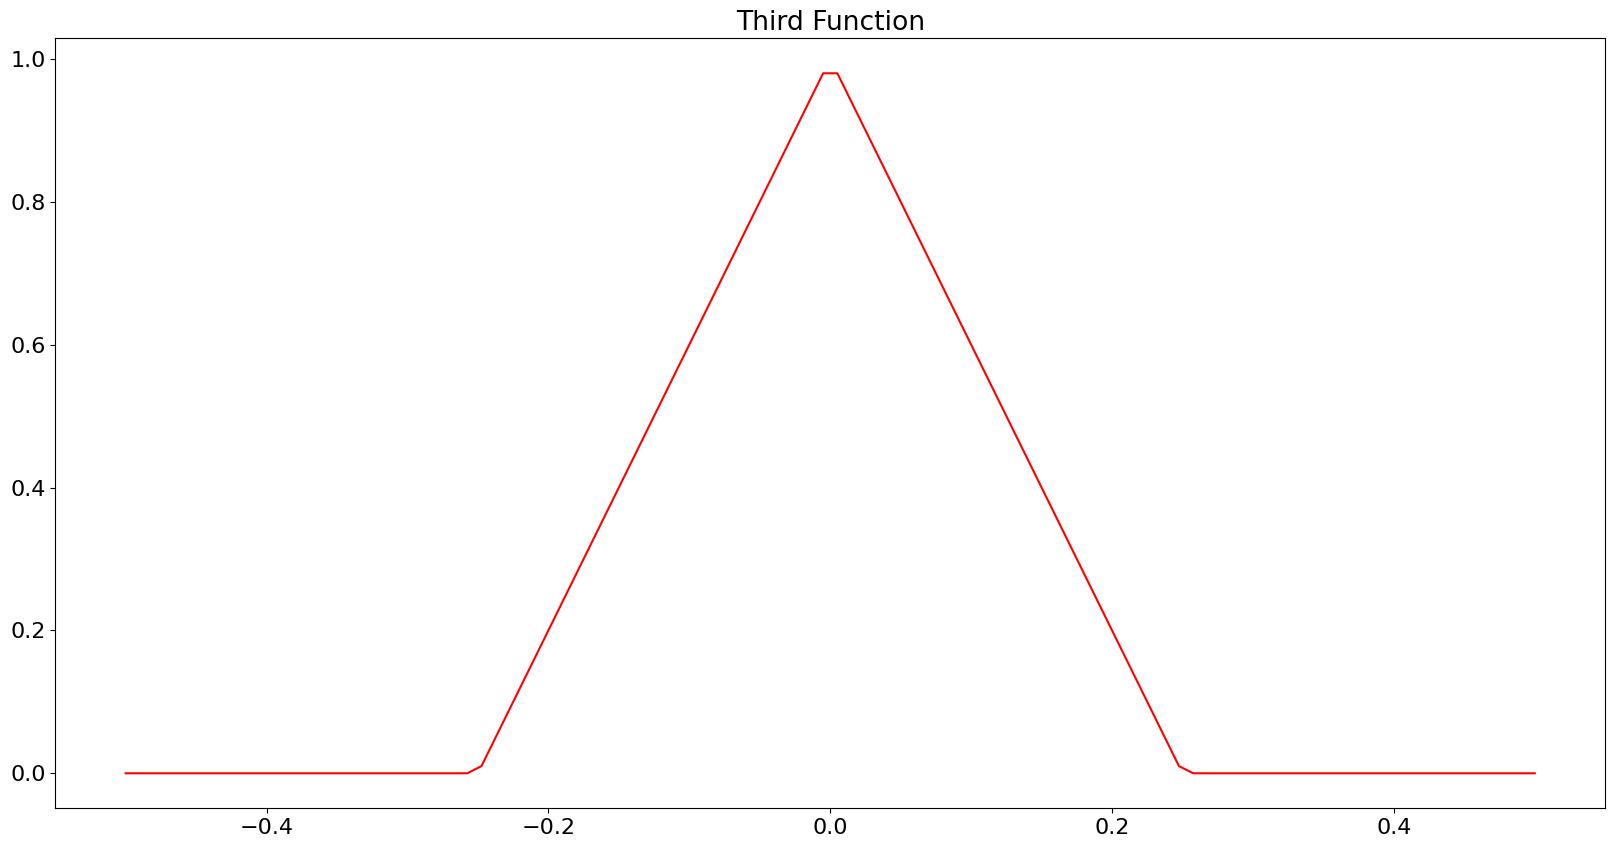

In [35]:
vf3 = vectorize(f3)
plt.plot(np.linspace(-.5,.5,100),vf3(np.linspace(-.5,.5,100)),'r')
plt.title("Third Function")
plt.savefig('exampleTF.png')

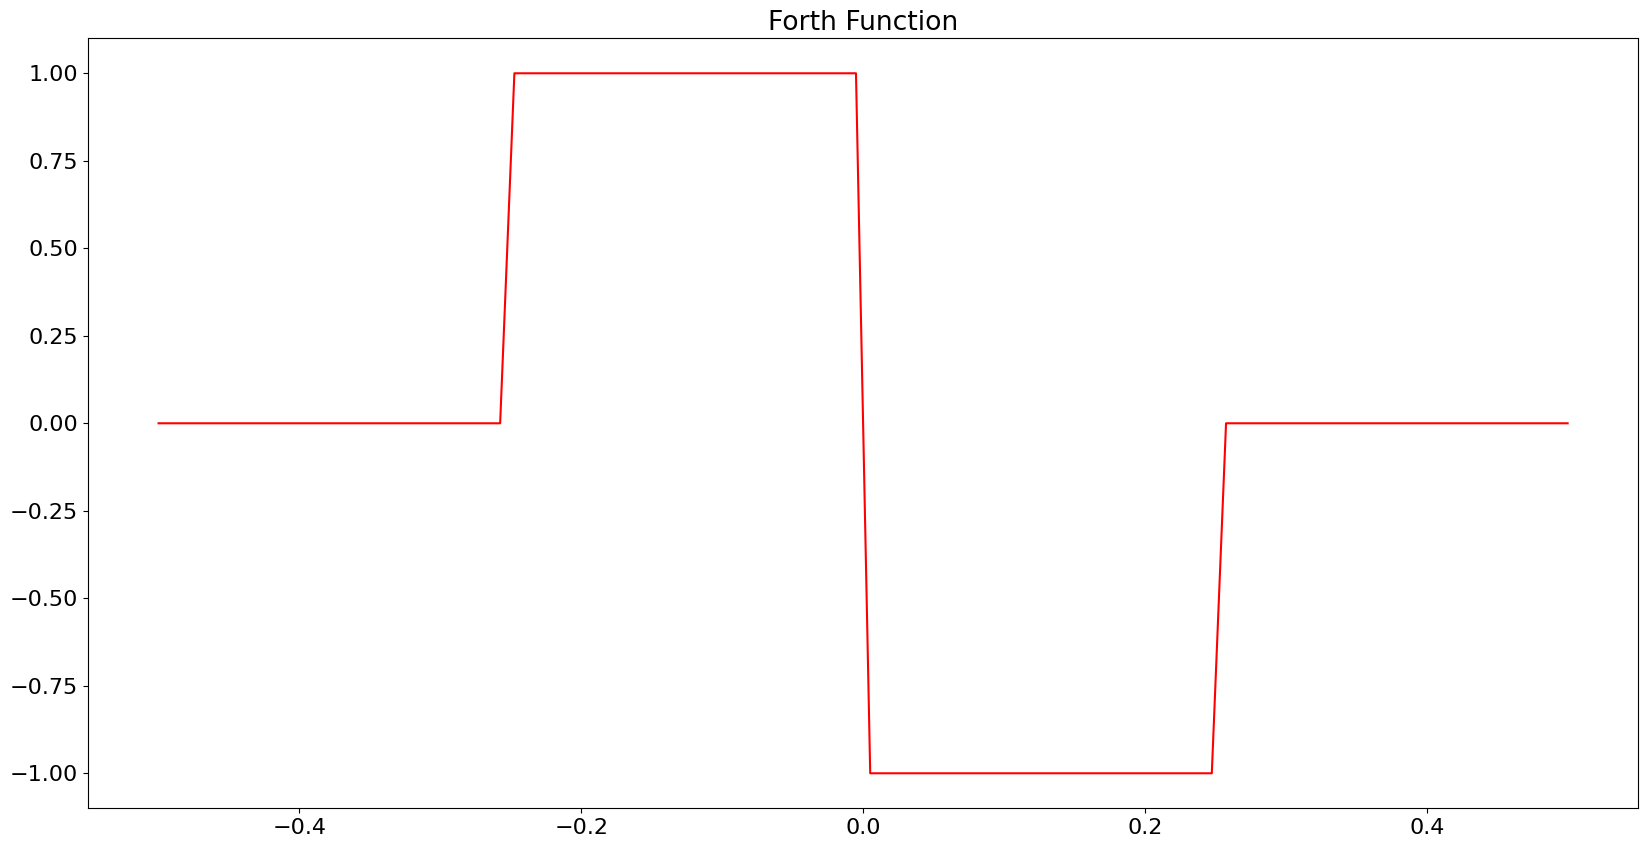

In [36]:
vf4 = vectorize(f4)
plt.plot(np.linspace(-.5,.5,100),vf4(np.linspace(-.5,.5,100)),'r')
plt.title("Forth Function")
plt.savefig('exampleFhF.png')

##Estimation with different number of Fourier terms for each function

In [ ]:

pt=0;
plt.subplots(figsize=(10,5))
xrange=np.linspace(-.5,.5,100);
for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
    cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
      return pxx
  plt.subplot(2, 2, pt)
  plt.plot(xrange,vf(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
  plt.ylim(-.5, 1.5)
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('exampleFSexpansion.png')